# 텍스트 마이닝

## 형태소

형태소 분석기에 따른 예시

In [2]:
# 모듈 설치
!pip install konlpy

In [3]:
# 형태소 분석기 - Twitter 예시
import codecs
from konlpy.tag import Twitter

twitter = Twitter()
line = '나는 국민대학교의 축제에 놀러 가고 싶습니다.'
malist = twitter.pos(line)
malist

[('나', 'Noun'),
 ('는', 'Josa'),
 ('국민', 'Noun'),
 ('대학교', 'Noun'),
 ('의', 'Josa'),
 ('축제', 'Noun'),
 ('에', 'Josa'),
 ('놀러', 'Verb'),
 ('가고', 'Verb'),
 ('싶습니다', 'Verb'),
 ('.', 'Punctuation')]

In [4]:
# 형태소 분석기 - Komoran 예시
import codecs
from konlpy.tag import Komoran

tagger = Komoran()
line = '나는 국민대학교의 축제에 놀러 가고 싶습니다.'
malist = tagger.pos(line)
malist

[('나', 'NP'),
 ('는', 'JX'),
 ('국민대학교', 'NNP'),
 ('의', 'JKG'),
 ('축제', 'NNG'),
 ('에', 'JKB'),
 ('놀', 'VV'),
 ('러', 'EC'),
 ('가', 'VV'),
 ('고', 'EC'),
 ('싶', 'VX'),
 ('습니다', 'EF'),
 ('.', 'SF')]

In [10]:
# 투캅스
from konlpy.tag import Komoran

tagger = Komoran() # 형태소 분석기
from urllib.parse import quote_plus
from bs4 import BeautifulSoup
import requests
import lxml.html
import codecs

# 투캅스 시나리오 읽어오기
articls = []
fp = codecs.open("D:/dl_data/투캅스.txt", "r", encoding="utf-8")
#soup = BeautifulSoup(fp, "html.parser")
#body = soup.select_one("body")
#text = body.getText()
text = fp.read()
articles = text.split("\r\n")
fp.close()

In [11]:
articles, len(articles)

(['\ufeff[투캅스]',
  '',
  '',
  '            S#1 프롤로그 (밤)',
  '',
  '',
  '            1. (화면 가득히 보이는 도로 양 옆의 현란한 ',
  '          아크릴 간판들)',
  '',
  '            2. (화려한 거리)',
  '',
  '            3. (패트롤 카, 밤거리를 달려 나간다.)',
  '',
  '            4. (자정 열두시가 되는 시계)',
  '',
  '            5. (간판 불이 하나 둘 탁탁 꺼진다.)',
  '',
  '            6. (꺼지는 간판들)',
  '',
  '            7. (가라오께의 간판불이 꺼진다.)',
  '',
  '            8.(웨이터 하나가 또다른 셔터에 자물쇠를 채우고 ',
  '          지하 계단을 내려간다. 웨이터가 사라지는 계단 ',
  '          아래쪽은 완전 적막!)',
  '',
  '            9. (좌르르! 내려 닫히는 출입구의 육중한 셔터 ',
  '          도어)',
  '',
  '            10. (채워지는 철문)',
  '',
  '            11. (패트롤이 지나치면 차 안에서 망보던 부엉이가 ',
  '          몸을 일으킨다.)',
  '',
  '            부엉이: 여긴 부엉이!',
  '            12. 사장: 수고했다. 올빼미는 어떤가?',
  '            13. 올빼미: 상황 끝.',
  '            14. 사장: 좋아, 작전 개시!',
  '            15. (배전판을 올리는 손)',
  '            16. (불이 켜지는 샹드리에)',
  '            17. 디제이: 네, 오랫동안 기다리셨습니다. 3번 ',
  '                     테이블 손님 권영락 씨 다

In [14]:
# 텍스트를 처리하기
twitter = Twitter()
results = []
lines = articles
words_all = []

for line in lines:
    # 형태소 분석하기
    malist = twitter.pos(line, norm=True, stem=True)
    # print(malist)
    
    r = []
    for word in malist:
        # 명사/동사/형용사면 걸러내기
        if word[1] in ['Noun','Verb','Adjective']:
            r.append(word[0])
            words_all.append(word[0])
    rl = (" ".join(r)).strip()
    results.append(rl)

In [15]:
words_all, len(words_all)

(['투캅스',
  '프롤로그',
  '밤',
  '화면',
  '가득하다',
  '보이다',
  '도로',
  '양',
  '옆',
  '현란하다',
  '아크릴',
  '간판',
  '화려하다',
  '거리',
  '패',
  '트롤',
  '카',
  '밤',
  '거리',
  '달다',
  '나가다',
  '자정',
  '열두시',
  '되다',
  '시계',
  '간판',
  '불',
  '하나',
  '둘',
  '탁탁',
  '꺼지다',
  '꺼지다',
  '간판',
  '가르다',
  '간판',
  '불',
  '꺼지다',
  '웨이터',
  '하나',
  '셔터',
  '자물쇠',
  '채우다',
  '지하',
  '계단',
  '내려가다',
  '웨이터',
  '사라지다',
  '계단',
  '아래쪽',
  '완전',
  '적막',
  '좌르르',
  '내다',
  '닫히다',
  '출입구',
  '육중',
  '셔터',
  '도어',
  '채우다',
  '철문',
  '패',
  '트롤',
  '지나치다',
  '차',
  '안',
  '망',
  '보다',
  '부엉이',
  '몸',
  '일으키다',
  '부엉이',
  '여기다',
  '부엉이',
  '사장',
  '수고',
  '하다',
  '올빼미',
  '어떻다',
  '올빼미',
  '상황',
  '끝',
  '사장',
  '좋다',
  '작전',
  '개시',
  '배',
  '전판',
  '올리다',
  '손',
  '불',
  '켜지다',
  '샹드리',
  '디제이',
  '네',
  '기다리다',
  '번',
  '테이블',
  '손님',
  '권',
  '영락',
  '씨',
  '차차차',
  '마이크',
  '잡고',
  '목',
  '터지다',
  '뽕짝',
  '불다',
  '끼',
  '사내',
  '멀티비젼',
  '장치',
  '되다',
  '화려하다',
  '무대',
  '위',
  '춤추다',
  '사람',
  '복도',
  '따르다',
  '보이다',

## TF-IDF 분석

In [31]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ziippy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ziippy\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

import nltk
import re

# 2글자 이상의 명사만 추출
def get_noun(text):
    text = re.sub('[^A-Za-z ]+', '', text)
    texts = nltk.word_tokenize(text)
    return ([x for (x,y) in (nltk.pos_tag(texts)) if (y =='NNP' or y =='NN') and len(x) > 1])
    
#cv = TfidfVectorizer(tokenizer=get_noun, max_features=100)
cv = TfidfVectorizer(max_features=100) # 사전은 100개 단어만 
tdm = cv.fit_transform(words_all)

In [41]:
len(words_all), tdm
# tdm 에 11890x100 인데, 여기서 11890 은 

(11890, <11890x100 sparse matrix of type '<class 'numpy.float64'>'
 	with 4283 stored elements in Compressed Sparse Row format>)

In [37]:
import numpy
import operator
words = cv.get_feature_names() # 단어 사전 추출
count_mat = tdm.sum(axis=0) # 단어별 합산
count = numpy.squeeze(numpy.asarray(count_mat)) # squeeze 로 차원을 하나 압축

word_count = list(zip(words, count)) # dictionary 하나 만들고
word_count = sorted(word_count, key=operator.itemgetter(1), reverse=True) # score 가 높은 것을 맨 위로 정렬

In [43]:
count_mat.shape

(1, 100)

In [44]:
count_mat        # 숫자가 높을수록 중요한 단어

matrix([[  41.,   13.,   20.,   20.,   13.,   53.,   15.,   35.,   34.,
           81.,   13.,   16.,   18.,   32.,   18.,   42.,   15.,   22.,
           18.,   13.,   19.,   16.,   13.,   22.,   56.,   52.,   12.,
           15.,   18.,   17.,   15.,   12.,   15.,   16.,   24.,   15.,
           18.,   15.,   34.,   34.,   25.,   25.,   19.,   84.,   20.,
           26.,   35.,   61.,   16.,   21.,   29.,   37.,   19.,   58.,
           27.,   14.,  147.,   12.,   29.,   61.,   16.,   21.,   24.,
           39.,   31.,   35.,   62.,   32.,   13.,   31.,   14.,   35.,
           16.,   29.,   14.,   22.,   29.,   13.,   13.,  178.,   14.,
           16.,   23.,   25.,   14.,   15.,   29.,   18.,   39.,   30.,
           17.,   30.,   19.,   33.,   18.,   31.,   26.,  356., 1079.,
           49.]])

In [38]:
word_count

[('형사', 1079.0),
 ('하다', 356.0),
 ('있다', 178.0),
 ('수원', 147.0),
 ('보다', 84.0),
 ('그렇다', 81.0),
 ('없다', 62.0),
 ('사장', 61.0),
 ('아니다', 61.0),
 ('소리', 58.0),
 ('되다', 56.0),
 ('경찰', 53.0),
 ('들다', 52.0),
 ('황조', 49.0),
 ('나오다', 42.0),
 ('가다', 41.0),
 ('알다', 39.0),
 ('좋다', 39.0),
 ('서장', 37.0),
 ('과장', 35.0),
 ('사람', 35.0),
 ('얼굴', 35.0),
 ('오다', 35.0),
 ('그랜저', 34.0),
 ('무슨', 34.0),
 ('미숙', 34.0),
 ('투캅스', 33.0),
 ('나가다', 32.0),
 ('여경', 32.0),
 ('어떻다', 31.0),
 ('여자', 31.0),
 ('필터', 31.0),
 ('주인', 30.0),
 ('지금', 30.0),
 ('서다', 29.0),
 ('쏘다', 29.0),
 ('우리', 29.0),
 ('이렇다', 29.0),
 ('정말', 29.0),
 ('소매치기', 27.0),
 ('사내', 26.0),
 ('하나', 26.0),
 ('반장', 25.0),
 ('받다', 25.0),
 ('잡다', 25.0),
 ('먹다', 24.0),
 ('않다', 24.0),
 ('자식', 23.0),
 ('놀라다', 22.0),
 ('돼다', 22.0),
 ('이다', 22.0),
 ('생각', 21.0),
 ('앉다', 21.0),
 ('같다', 20.0),
 ('거리', 20.0),
 ('보이다', 20.0),
 ('달려오다', 19.0),
 ('변태', 19.0),
 ('선배', 19.0),
 ('치다', 19.0),
 ('꼴통', 18.0),
 ('나다', 18.0),
 ('누구', 18.0),
 ('들어오다', 18.0),
 ('모르다', 18.0),
 ('

In [40]:
len(word_count)

100

In [39]:
hot_key = list(dict(word_count).keys())
hot_key

['형사',
 '하다',
 '있다',
 '수원',
 '보다',
 '그렇다',
 '없다',
 '사장',
 '아니다',
 '소리',
 '되다',
 '경찰',
 '들다',
 '황조',
 '나오다',
 '가다',
 '알다',
 '좋다',
 '서장',
 '과장',
 '사람',
 '얼굴',
 '오다',
 '그랜저',
 '무슨',
 '미숙',
 '투캅스',
 '나가다',
 '여경',
 '어떻다',
 '여자',
 '필터',
 '주인',
 '지금',
 '서다',
 '쏘다',
 '우리',
 '이렇다',
 '정말',
 '소매치기',
 '사내',
 '하나',
 '반장',
 '받다',
 '잡다',
 '먹다',
 '않다',
 '자식',
 '놀라다',
 '돼다',
 '이다',
 '생각',
 '앉다',
 '같다',
 '거리',
 '보이다',
 '달려오다',
 '변태',
 '선배',
 '치다',
 '꼴통',
 '나다',
 '누구',
 '들어오다',
 '모르다',
 '졸개',
 '표정',
 '들이다',
 '죽다',
 '꺼내다',
 '달리다',
 '맞다',
 '새끼',
 '아파트',
 '오렌지',
 '자다',
 '고개',
 '남자',
 '들어서다',
 '따르다',
 '말다',
 '멸치',
 '모습',
 '전화',
 '손님',
 '열다',
 '웨이터',
 '자네',
 '전경',
 '가지',
 '걸어오다',
 '근무',
 '다시',
 '대다',
 '여기',
 '이르다',
 '임마',
 '들어가다',
 '마약',
 '싶다']

## WordCloud 생성

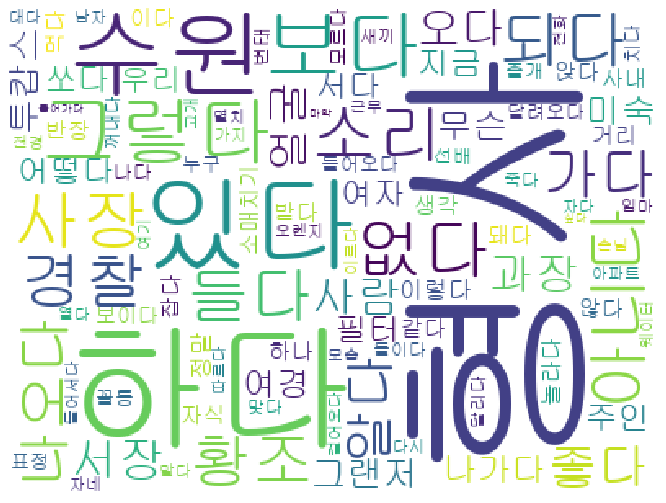

In [46]:
%matplotlib inline
from matplotlib import pyplot
from wordcloud import WordCloud
wc = WordCloud(font_path='C:\\Windows\\Fonts\\NGULIM.ttf', background_color='white', width=400, height=300)
cloud = wc.fit_words(dict(word_count))

pyplot.figure(figsize=(12,9))
pyplot.imshow(cloud)
pyplot.axis("off")
pyplot.show()

In [47]:
count_iter = iter(count)
word_dict = dict(zip(words, count_iter))
word_dict

{'가다': 41.0,
 '가지': 13.0,
 '같다': 20.0,
 '거리': 20.0,
 '걸어오다': 13.0,
 '경찰': 53.0,
 '고개': 15.0,
 '과장': 35.0,
 '그랜저': 34.0,
 '그렇다': 81.0,
 '근무': 13.0,
 '꺼내다': 16.0,
 '꼴통': 18.0,
 '나가다': 32.0,
 '나다': 18.0,
 '나오다': 42.0,
 '남자': 15.0,
 '놀라다': 22.0,
 '누구': 18.0,
 '다시': 13.0,
 '달려오다': 19.0,
 '달리다': 16.0,
 '대다': 13.0,
 '돼다': 22.0,
 '되다': 56.0,
 '들다': 52.0,
 '들어가다': 12.0,
 '들어서다': 15.0,
 '들어오다': 18.0,
 '들이다': 17.0,
 '따르다': 15.0,
 '마약': 12.0,
 '말다': 15.0,
 '맞다': 16.0,
 '먹다': 24.0,
 '멸치': 15.0,
 '모르다': 18.0,
 '모습': 15.0,
 '무슨': 34.0,
 '미숙': 34.0,
 '반장': 25.0,
 '받다': 25.0,
 '변태': 19.0,
 '보다': 84.0,
 '보이다': 20.0,
 '사내': 26.0,
 '사람': 35.0,
 '사장': 61.0,
 '새끼': 16.0,
 '생각': 21.0,
 '서다': 29.0,
 '서장': 37.0,
 '선배': 19.0,
 '소리': 58.0,
 '소매치기': 27.0,
 '손님': 14.0,
 '수원': 147.0,
 '싶다': 12.0,
 '쏘다': 29.0,
 '아니다': 61.0,
 '아파트': 16.0,
 '앉다': 21.0,
 '않다': 24.0,
 '알다': 39.0,
 '어떻다': 31.0,
 '얼굴': 35.0,
 '없다': 62.0,
 '여경': 32.0,
 '여기': 13.0,
 '여자': 31.0,
 '열다': 14.0,
 '오다': 35.0,
 '오렌지': 16.0,
 '우리': 29.0,
 '웨이터': 14

In [48]:
import operator
sorted_tfidf = sorted(word_dict.items(), key=operator.itemgetter(1), reverse=True)
sorted_tfidf

[('형사', 1079.0),
 ('하다', 356.0),
 ('있다', 178.0),
 ('수원', 147.0),
 ('보다', 84.0),
 ('그렇다', 81.0),
 ('없다', 62.0),
 ('사장', 61.0),
 ('아니다', 61.0),
 ('소리', 58.0),
 ('되다', 56.0),
 ('경찰', 53.0),
 ('들다', 52.0),
 ('황조', 49.0),
 ('나오다', 42.0),
 ('가다', 41.0),
 ('알다', 39.0),
 ('좋다', 39.0),
 ('서장', 37.0),
 ('과장', 35.0),
 ('사람', 35.0),
 ('얼굴', 35.0),
 ('오다', 35.0),
 ('그랜저', 34.0),
 ('무슨', 34.0),
 ('미숙', 34.0),
 ('투캅스', 33.0),
 ('나가다', 32.0),
 ('여경', 32.0),
 ('어떻다', 31.0),
 ('여자', 31.0),
 ('필터', 31.0),
 ('주인', 30.0),
 ('지금', 30.0),
 ('서다', 29.0),
 ('쏘다', 29.0),
 ('우리', 29.0),
 ('이렇다', 29.0),
 ('정말', 29.0),
 ('소매치기', 27.0),
 ('사내', 26.0),
 ('하나', 26.0),
 ('반장', 25.0),
 ('받다', 25.0),
 ('잡다', 25.0),
 ('먹다', 24.0),
 ('않다', 24.0),
 ('자식', 23.0),
 ('놀라다', 22.0),
 ('돼다', 22.0),
 ('이다', 22.0),
 ('생각', 21.0),
 ('앉다', 21.0),
 ('같다', 20.0),
 ('거리', 20.0),
 ('보이다', 20.0),
 ('달려오다', 19.0),
 ('변태', 19.0),
 ('선배', 19.0),
 ('치다', 19.0),
 ('꼴통', 18.0),
 ('나다', 18.0),
 ('누구', 18.0),
 ('들어오다', 18.0),
 ('모르다', 18.0),
 ('

In [50]:
import pandas as pd
tfidf_df = pd.DataFrame(list(sorted_tfidf), columns=("word", "tfidf_score"))
tfidf_df

,word,tfidf_score
0,형사,1079.0
1,하다,356.0
2,있다,178.0
3,수원,147.0
4,보다,84.0
...,...,...
95,이르다,13.0
96,임마,13.0
97,들어가다,12.0
98,마약,12.0


In [ ]:
# tfidf_df.to_csv('sorted_tfidf.csv')